Տողերի և սյունակների քանակ: (303, 14)

Սյունակների տիպերը:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Վիճակագրական ամփոփ տվյալներ:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.0

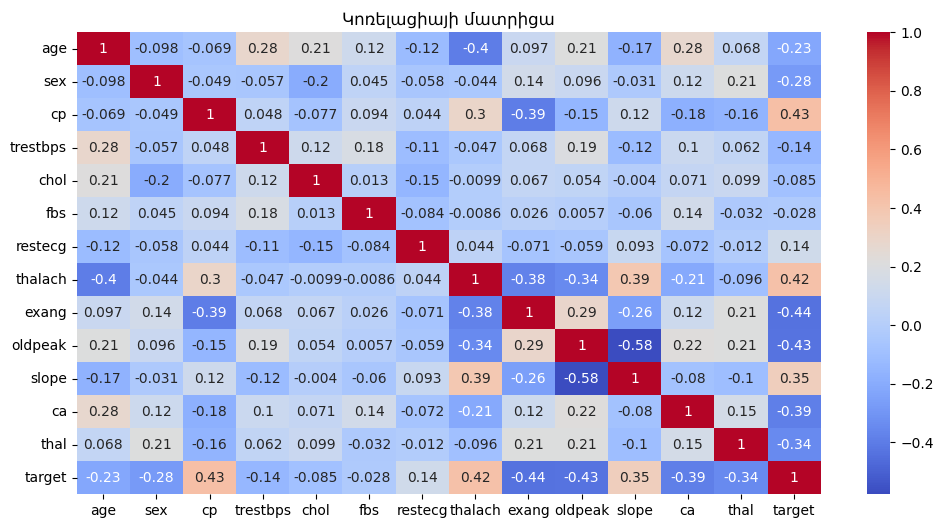


Բացակայող արժեքներ՝
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


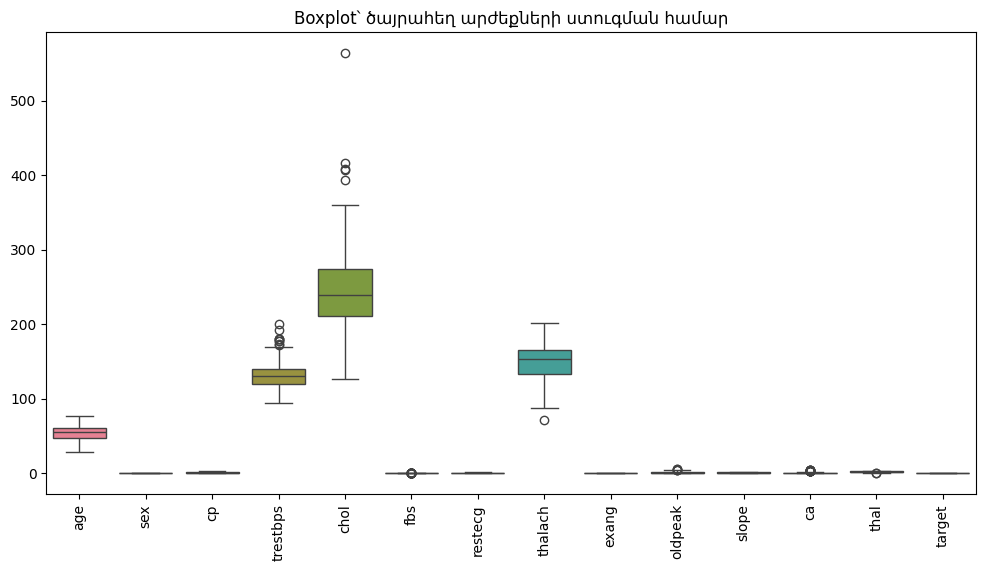

In [13]:
#Տվյալների ուսումնասիրություն և նախապատրաստում

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Տողերի և սյունակների քանակ
print("Տողերի և սյունակների քանակ:", df.shape)

# Սյունակների տիպերը
print("\nՍյունակների տիպերը:\n", df.dtypes)

# Վիճակագրական ամփոփ տվյալներ
print("\nՎիճակագրական ամփոփ տվյալներ:\n", df.describe())

# Կորելացիայի մատրից
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Կոռելացիայի մատրիցա")
plt.show()

# Բացակայող արժեքների ստուգում
print("\nԲացակայող արժեքներ՝\n", df.isnull().sum())

# Ծայրահեղ արժեքներ - boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot՝ ծայրահեղ արժեքների ստուգման համար")
plt.show()


In [9]:
#Տվյալների նորմալացում

from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Տվյալների բաժանում՝ Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


--- Logistic Regression ---
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375


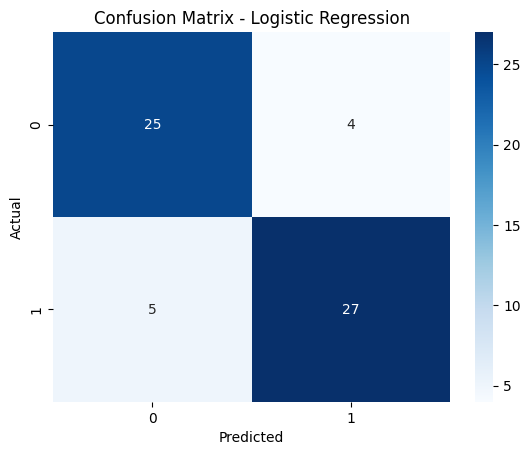

In [11]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Մոդելի ուսուցում
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Կանխատեսում
y_pred_log = log_reg.predict(X_test)

# Գնահատում
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# Շփոթեցնող մատրիցա
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- KNN (k=5) ---
Accuracy: 0.9180327868852459
Precision: 0.9354838709677419
Recall: 0.90625


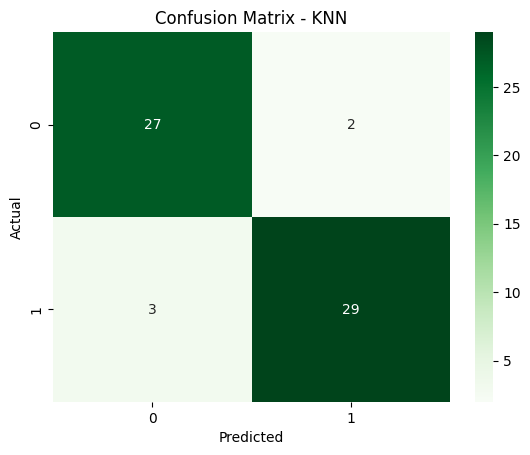

In [12]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("\n--- KNN (k=5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

# Շփոթեցնող մատրիցա
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()